In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../src') # Add source code to path

# Import source code
from preprocessing import load_data

# Read in the dataset
df = load_data()


## Introduction


### *Towards a better understanding of the world's health landscape*

Life expectancy is a statistical measurement used to estimate an individual's lifespan. Our aim as a team is to provide you with a tool that can accurately predict this estimate.

*So why should this matter to you?*

On an individual level, life expectancy is crucial in determining one's plans, support and care. On a larger group level, it holds paramount socio-economical implications.

On a country level, it is used to derive insights, analytics and further studies to better understand the needs & risk factors of populations.


## Data Overview & Exploratory Data Analysis


To begin, we needed to ensure the model was built on sound, representative data for optimum accuracy. In an initial exploratory stage, we performed an overview to assess the current state of the data, conducted checks, and corrected any missing or misrepresentative data.

### Overview

We identified that our dataset includes a range of features capturing socio-economic, health, and demographic statistics, spanning 179 countries over a 16 year period.

In [6]:
df.shape

(2864, 21)

In [4]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [7]:
df.nunique().sort_values(ascending=False)

Adult_mortality                2850
GDP_per_capita                 2564
Population_mln                 1803
Alcohol_consumption            1164
Under_five_deaths              1035
Infant_deaths                   847
Life_expectancy                 396
Incidents_HIV                   393
Thinness_five_nine_years        207
Thinness_ten_nineteen_years     200
Country                         179
Schooling                       130
BMI                             120
Measles                          87
Diphtheria                       80
Hepatitis_B                      80
Polio                            77
Year                             16
Region                            9
Economy_status_Developed          2
Economy_status_Developing         2
dtype: int64

### Data Cleaning

We were fortunate that the dataset required minimal cleaning. It contained no missing values, duplicates, or data entry inconsistencies. All feature names were suitable for modelling, and the only outlier identified for further review was GDP_per_capita, which we addressed later during the feature engineering and transformation stage.

We also understood that two models were to be developed: one using the full dataset and another excluding sensitive information. We classified specific identifiers and any health-related records as sensitive data, while information that is publicly accessible was considered non-sensitive.

### Correlations:

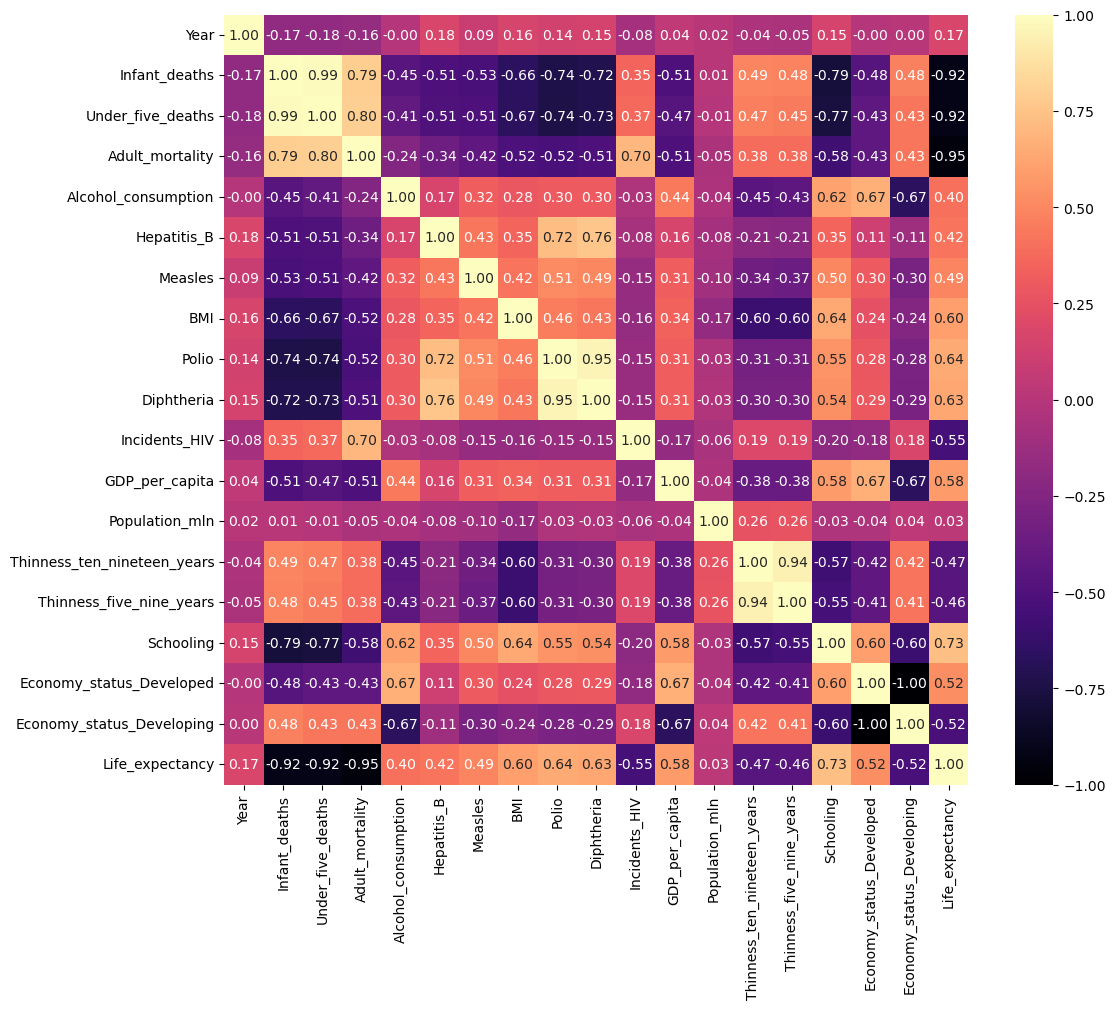

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='magma')
plt.savefig('../visualisations/correlation', bbox_inches='tight')
plt.show()


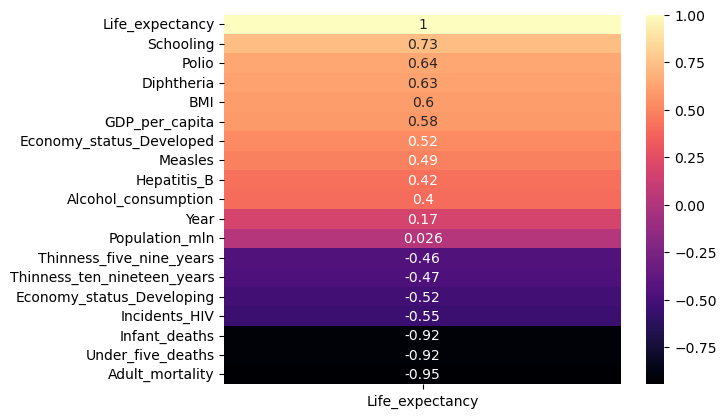

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['Life_expectancy']].sort_values(by='Life_expectancy', 
            ascending=False), 
            annot=True,
            cmap='magma')
plt.savefig('../visualisations/life_expectancy_correlations', bbox_inches = 'tight')
plt.show()

In [11]:
corr_life = df.corr(numeric_only=True)['Life_expectancy'].sort_values(ascending=False)

# Display the top 10 most correlated features
print('Top positive correlations:')
print(corr_life.head(10))

print('\nTop negative correlations:')
print(corr_life.tail(10))

Top positive correlations:
Life_expectancy             1.000000
Schooling                   0.732484
Polio                       0.641217
Diphtheria                  0.627541
BMI                         0.598423
GDP_per_capita              0.583090
Economy_status_Developed    0.523791
Measles                     0.490019
Hepatitis_B                 0.417804
Alcohol_consumption         0.399159
Name: Life_expectancy, dtype: float64

Top negative correlations:
Alcohol_consumption            0.399159
Year                           0.174359
Population_mln                 0.026298
Thinness_five_nine_years      -0.458166
Thinness_ten_nineteen_years   -0.467824
Economy_status_Developing     -0.523791
Incidents_HIV                 -0.553027
Infant_deaths                 -0.920032
Under_five_deaths             -0.920419
Adult_mortality               -0.945360
Name: Life_expectancy, dtype: float64


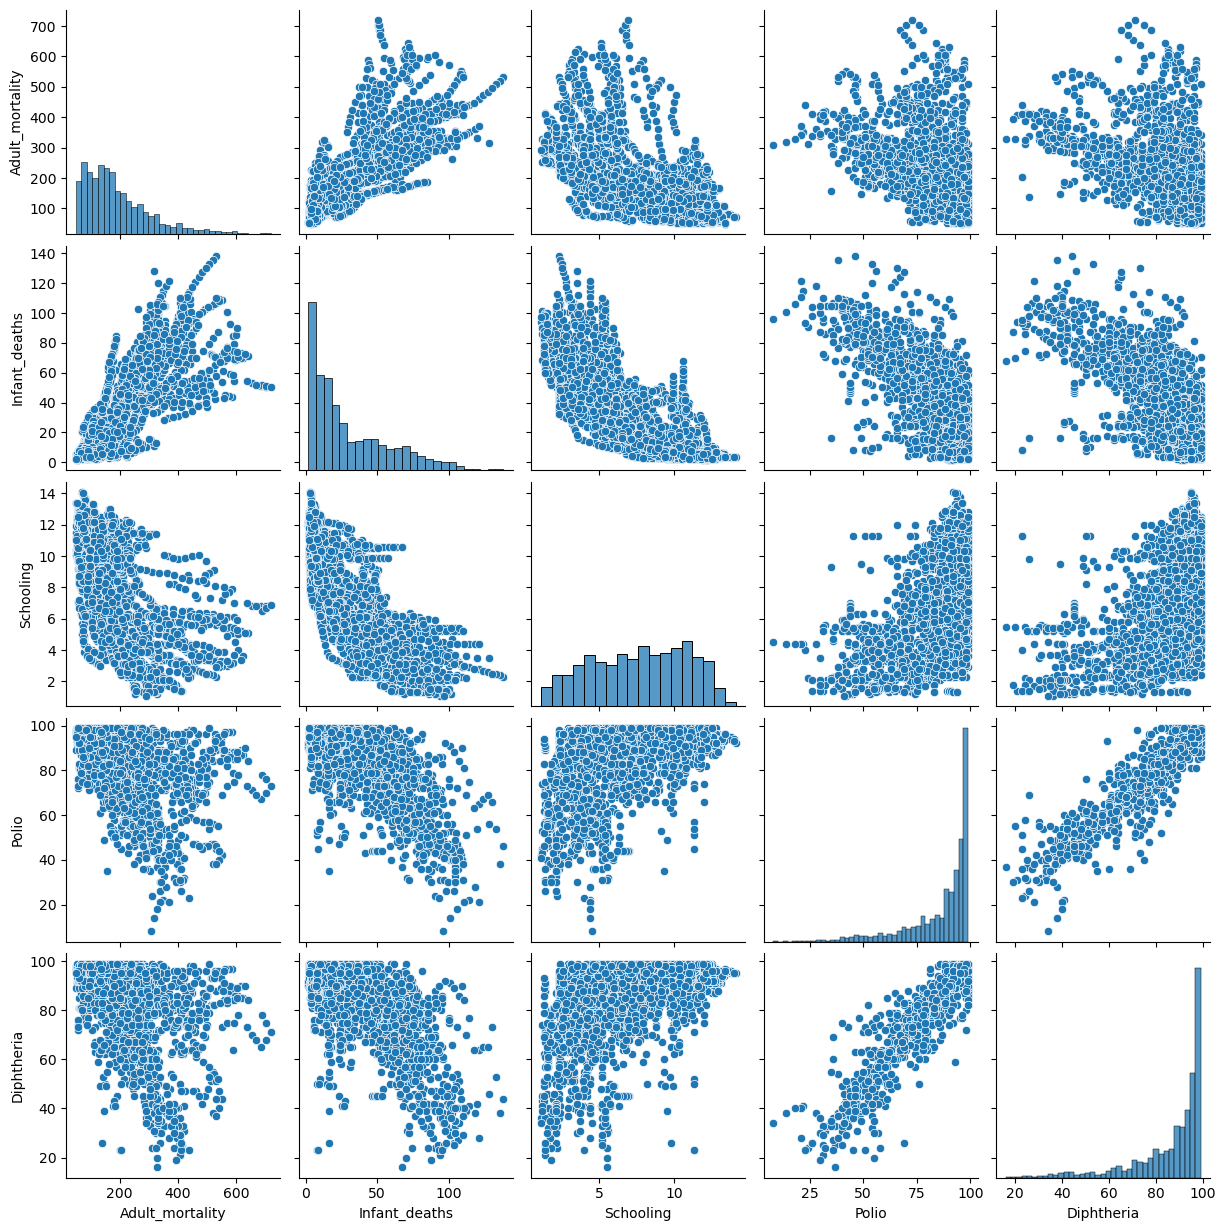

In [ ]:
cols = [ 
        'Adult_mortality',
        'Infant_deaths',
        'Schooling',
        'Polio',
        'Diphtheria',
]


sns.pairplot(df[cols]) 
plt.savefig('../visualisations/pairplot1', bbox_inches = 'tight')
plt.show()

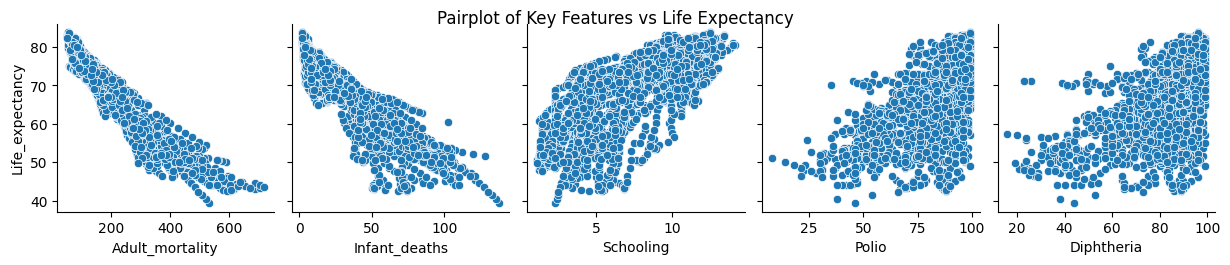

In [4]:
cols = [ 
        'Adult_mortality',
        'Infant_deaths',
        'Schooling',
        'Polio',
        'Diphtheria',
]

sns.pairplot(
    df, 
    x_vars=cols,
    y_vars=['Life_expectancy']
)
plt.suptitle('Pairplot of Key Features vs Life Expectancy', y=1.02)
plt.savefig('../visualisations/pairplot2', bbox_inches = 'tight')
plt.show()

### Summary of Findings

Identified Key Features:

- Adult Mortality
- Infant Deaths
- Schooling
- Polio
- Diphtheria
- BMI
- GDP per Capita
- Economy Status (Developed)
- Measles
- Thinness (Ages 10–19)

Overview:

- The dataset is clean, with no major missing values or duplicate entries.

- Both numerical and categorical features have been clearly identified.

- Outlier inspection and correlation analysis highlight several variables with strong potential impact.

- The data is now well-prepared for the preprocessing and modeling stages.